data-> pre-process-> analysis-> train-test split-> train the training data set using LOGISTIC REGRESSION MODEL
(bcz it is binary classification -> 2 cases: survived/not ) -> test data set to evaluate our model


### import all reqd dependencies

In [1]:
import numpy as np
import pandas as pd   # create dataframe
import matplotlib.pyplot as plt   # visualisation
import seaborn as sns     # visualisation
from sklearn.model_selection import train_test_split # split dataset into train_test, 
                                                     # sklearn contains many pre-processing func and ml algo
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


 ### data collection and pre-processing

In [2]:
t_df=pd.read_csv('train.csv')
from pprint import pprint
print(t_df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
t_df.shape

(891, 12)

In [5]:
t_df.info()  # basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# check no. of missing val in each col
t_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### deal with missing values



In [3]:
# CABIN COLUMN
# remove cabin col as it contains too many missing val, impossible to replace
# create new df after dropping cabin col
t_df=t_df.drop(columns='Cabin', axis=1)  # axis 0=row, 1=col, here we are droppin a entire col, so axis=1

In [4]:
print(t_df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [10]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
t_df.shape

(891, 11)

In [5]:
# AGE COLUMN
# replace the missing values with the mean of entire col
# fillna = fill missing values
#inplace = true will make sure change is reflected in original df

t_df['Age'].fillna(t_df['Age'].mean(),inplace=True)

In [13]:
print(t_df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             Heikkinen, Miss. Laina  female  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                           Allen, Mr. William Henry    male  35.000000   
5                                   Moran, Mr. James    male  29.699118   
6                            McCarthy, Mr. Timothy J    male  54.000000   
7  

In [6]:
# EMBARKED COLUMN

# we will replace the missing val with the val among s,q,c that has highest freq

print(t_df['Embarked'].mode())

0    S
dtype: object


In [7]:
print(t_df['Embarked'].mode()[0])

S


In [8]:
# replace issing val in embarked col with 'S'

t_df['Embarked'].fillna(t_df['Embarked'].mode()[0],inplace=True)

In [10]:
t_df.info()   # check whether all missing val have been handled -> we see now all are non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### DATA ANALYSIS

In [13]:
t_df.describe()  # statistical data of numrical data's, doesn't work for categorial columns and strings
                 # (makes no sense for survive col or age column)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# find num f ppl who survived

t_df['Survived'].value_counts()        # 0-> not survive   1-> survive

0    549
1    342
Name: Survived, dtype: int64

### DATA VISUALIZATION

In [15]:
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

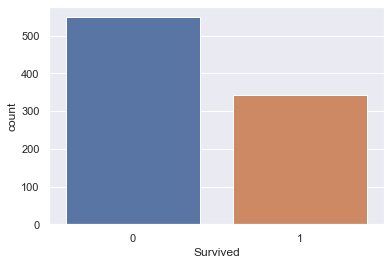

In [20]:
# making count plot for survived col

sns.countplot(x='Survived',data=t_df)  # most did not survive


<AxesSubplot:xlabel='Sex', ylabel='count'>

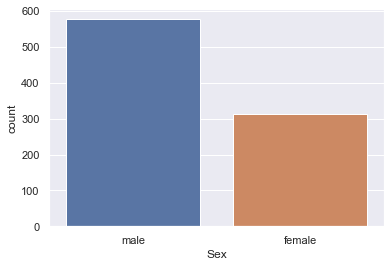

In [21]:
sns.countplot(x='Sex',data=t_df)   # more men were there


In [22]:
t_df['Survived'].value_counts()   

0    549
1    342
Name: Survived, dtype: int64

In [23]:
t_df['Sex'].value_counts()   

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

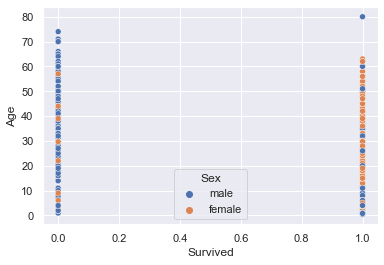

In [25]:
sns.scatterplot(y='Age',x='Survived',hue='Sex',data=t_df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

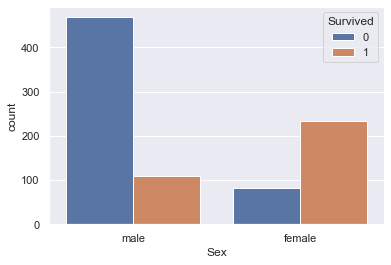

In [27]:
# ppl survived based on sex

sns.countplot('Sex',hue='Survived',data=t_df)    # more women survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

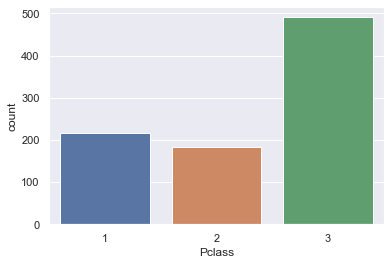

In [29]:
sns.countplot('Pclass',data=t_df)   # more ppl in 3rd class

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

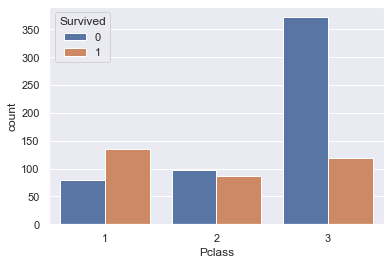

In [31]:
# ppl survived based on class

sns.countplot('Pclass',hue='Survived', data=t_df)   # more ppl from 1st class survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare', ylabel='count'>

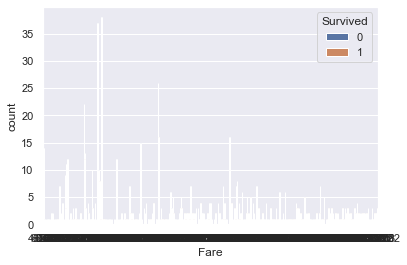

In [41]:
sns.countplot('Fare',hue='Survived', data=t_df)   # more ppl from 1st class survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

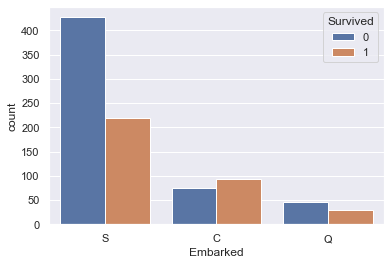

In [42]:
sns.countplot('Embarked',hue='Survived', data=t_df)   # more ppl from 1st class survived

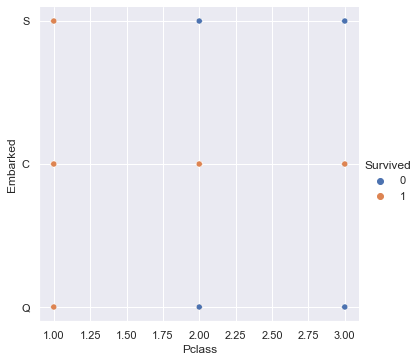

In [47]:
sns.relplot(x='Pclass',y='Embarked',hue='Survived',data=t_df)   # we see ppl who embarked from C survived, no matter which class they belong to

### ENCODING CATEGORICAL COLUMN TO NUMERICAL DATA

In [ ]:
## replace male/female and embarked col with numerical value as comp can't process text data
# also drop name col bcz its of no use

In [48]:
t_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
t_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
## convert sex and embarked column   : male=0, female=1    s=0, c=1, q=2

t_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [51]:
print(t_df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name  Sex        Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  22.000000      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.000000      1   
2                             Heikkinen, Miss. Laina    1  26.000000      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.000000      1   
4                           Allen, Mr. William Henry    0  35.000000      0   
5                                   Moran, Mr. James    0  29.699118      0   
6                            McCarthy, Mr. Timothy

### Separate TARGET and FEATURES column

In [53]:
## TARGET COLUMN=SURVIVED COLUMN

x=t_df.drop(['PassengerId','Name','Ticket','Survived'],axis=1)   # remove all those cols which are of no use to my analysis
                                                                 # drop row= axis 0. drop col= axis 1
                                                                 # drop survive col as weel and keep it in another variable
y=t_df['Survived']

In [55]:
print(x.head(10))       # we see 'PassengerId','Name','Ticket','Survived' have been removed


   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0       3    0  22.000000      1      0   7.2500         0
1       1    1  38.000000      1      0  71.2833         1
2       3    1  26.000000      0      0   7.9250         0
3       1    1  35.000000      1      0  53.1000         0
4       3    0  35.000000      0      0   8.0500         0
5       3    0  29.699118      0      0   8.4583         2
6       1    0  54.000000      0      0  51.8625         0
7       3    0   2.000000      3      1  21.0750         0
8       3    1  27.000000      0      2  11.1333         0
9       2    1  14.000000      1      0  30.0708         1


In [56]:
print(y.head(10))       # contains only survived col values

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64


### SPLITTING DATA INTO TRAIN AND TEST DATA

In [57]:
# split my data into 4 arrays of train and test(2 x, 2 y) & corresponding values of x_train and x_test will be stored in 
# y_train and y_test resp.(survived/not) 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2) 
          # we have imported train_test_split func
          # test=0.2->20% data will go to test dataset and 80% will be utilised for training purpose
          # when we specify random state=2(can be any int), everytime we run our code, it will split data in same pattern
    


In [60]:
print(x.shape,x_train.shape,x_test.shape)   # how many in each

(891, 7) (712, 7) (179, 7)


In [61]:
print(y.shape,y_train.shape,y_test.shape)   # how many in each

(891,) (712,) (179,)


### MODEL TRAINING - using logistic regression bcz it is binary classification

LOGISTIC REGRESSION EQN:       
                       SIGMOID CURVE BY SIGMOID FORMULA
                       
    $$ Y=\frac{1}{1+e^-z} $$  -> sigmoid curve formula for logistic regression
    $$ Z=\{w*x}+{b} $$
                            here, 
                                 x=input features
                                 y=prediction probability (survived/not) -> prob values -> lie b/w 0 and 1
                                 w=weights  (sex col, age col will have higher wt)
                                 b=biases   (intercept value)
                                 
                                 so if y>0.5 -> survived        keep threshold=0.5
                                       y<0.5 -> did not survive
    

$$ Y=\frac{1}{1+e^-z} $$

$$ Z=\{w*x}+{b} $$

In [71]:
model=LogisticRegression(max_iter=1000)

In [73]:
# training logistic regression model with training data
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### MODEL EVALUATION USING ACCURACY SCORE

In [ ]:
## accuracy on training data , give values from training data and our model will predict whether persion survived
#  or not(0/1) and compare with actual result. Then we will apply it to our testing data set

STEPS TO FOLLOW :
    1. see what our model is predictiong for train data
    2. compare it with actual result  -> accuracy score
    3. now see what our model is predicting for test data
    4. compare predicted value with actual result  -> accuracy score
    5. if accuracy score of training>testing hen over-fitting, means our model works well for training dataset but could not
       predict with that accuracy on our testing dataset 
    

In [84]:
x_train_prediction=model.predict(x_train) # see what our model is predicting for train data

In [76]:
print(x_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [78]:
# accuracy score will tell us how many correct predictions has out model made  : accuracy > 75% is pretty good we got 80.89%

training_data_accuracy=accuracy_score(y_train,x_train_prediction)  # compare it with actual result
print("Accuracy on training data=",training_data_accuracy )

Accuracy on training data= 0.8089887640449438


In [ ]:
## evaluate model using test data : accuracy score for test data

In [83]:
x_test_prediction=model.predict(x_test)   # now check for testing data

In [80]:
print(x_test_prediction)  # print predicted value on test data

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [82]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)  # compare predicted value with actual result
print("Accuracy on test data=",test_data_accuracy )     # over-fitting: accuracy of training > accuracy of testing

Accuracy on test data= 0.7821229050279329
